In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim #For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

# comp-linguistics
import spacy

#Displays the graphs
import graphviz

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json
import re
import zipfile
import os
import sys
import pandas as pd
import random 

## Getting My Corpus

I am using the COCA corpus, which I have downloaded to my local computer.

In [217]:
corpus_name = "/Users/vedikaahuja/winter2020/Content-Analysis-2020/COCA"

In [218]:
def loadcorpus(corpus_name, corpus_style="text"):
    texts_raw = {}
    for file in os.listdir(corpus_name + "/"):
        if corpus_style in file:
            print(file)
            zfile = zipfile.ZipFile(corpus_name + "/" + file)
            for file in zfile.namelist():
                texts_raw[file] = []
                with zfile.open(file) as f:
                    for line in f:
                        texts_raw[file].append(line)
    return texts_raw

In [219]:
coca_raw = loadcorpus(corpus_name)

text_magazine_jex.zip
text_spoken_kde.zip
text_fiction_awq.zip
text_newspaper_lsp.zip
text_academic_rpe.zip
text_2012-2015_ksr.zip


In [7]:
coca_raw.keys()

dict_keys(['w_mag_1990.txt', 'w_mag_1991.txt', 'w_mag_1992.txt', 'w_mag_1993.txt', 'w_mag_1994.txt', 'w_mag_1995.txt', 'w_mag_1997.txt', 'w_mag_1998.txt', 'w_mag_1999.txt', 'w_mag_2000.txt', 'w_mag_2001.txt', 'w_mag_2002.txt', 'w_mag_2003.txt', 'w_mag_2004.txt', 'w_mag_2005.txt', 'w_mag_2006.txt', 'w_mag_2007.txt', 'w_mag_2008.txt', 'w_mag_2009.txt', 'w_mag_2010.txt', 'w_mag_2011.txt', 'w_mag_2012.txt', 'w_mag_1996.txt', 'w_spok_1990.txt', 'w_spok_1991.txt', 'w_spok_1992.txt', 'w_spok_1993.txt', 'w_spok_1994.txt', 'w_spok_1995.txt', 'w_spok_1996.txt', 'w_spok_1997.txt', 'w_spok_1998.txt', 'w_spok_1999.txt', 'w_spok_2000.txt', 'w_spok_2001.txt', 'w_spok_2002.txt', 'w_spok_2003.txt', 'w_spok_2004.txt', 'w_spok_2005.txt', 'w_spok_2006.txt', 'w_spok_2007.txt', 'w_spok_2008.txt', 'w_spok_2009.txt', 'w_spok_2010.txt', 'w_spok_2011.txt', 'w_spok_2012.txt', 'w_fic_1990.txt', 'w_fic_1991.txt', 'w_fic_1992.txt', 'w_fic_1993.txt', 'w_fic_1994.txt', 'w_fic_1995.txt', 'w_fic_1996.txt', 'w_fic_1997.

In [ ]:
#sample_texts = random.sample(list(coca_raw.keys()), 15)

In [220]:
def clean_raw_text(raw_texts):
    clean_texts = []
    for text in raw_texts:
        try:
            text = text.decode("utf-8")
            clean_text = text.replace(" \'m", "'m").replace(" \'ll", "'ll").replace(" \'re", "'re").replace("\'s", "'s").replace(" \'re", "'re").replace(" n\'t", "n't").replace(" \'ve", "'ve").replace(" /'d", "'d").replace("<p>", "").replace("@", "")
            clean_texts.append(clean_text)
        except AttributeError:
            # print("ERROR CLEANING")
            # print(text)
            continue
        except UnicodeDecodeError:
            # print("Unicode Error, Skip")
            continue
    return clean_texts

In [221]:
text_df = {"year":[] , "genre":[], "text":[], "tokenized_text": []}

In [222]:
coca_texts = {}
for files in coca_raw:
    # collect year and genre info
    if files[0] != "w":
        year, genretxt = files.split("_")
        genre = genretxt[0:-4]
    else:
        w, genre, yeartxt = files.split("_")
        year = yeartxt[:4]
    
    if genre == "news":
        print(files)
        coca_text = clean_raw_text(coca_raw[files][1:])
        for text_list in coca_text:
            txts = lucem_illud_2020.word_tokenize(text_list)
            try:
                coca_texts[txts[0][2:]] = txts[1:]

                #append info to dataframe
                text_df['year'].append(year)
                text_df['genre'].append(genre)
                text_df['text'].append(text_list)
                text_df['tokenized_text'].append(txts[1:])

            except IndexError:
                continue

w_news_1990.txt
w_news_1991.txt
w_news_1992.txt
w_news_1993.txt
w_news_1994.txt
w_news_1995.txt
w_news_1996.txt
w_news_1997.txt
w_news_1998.txt
w_news_1999.txt
w_news_2000.txt
w_news_2001.txt
w_news_2002.txt
w_news_2003.txt
w_news_2004.txt
w_news_2005.txt
w_news_2006.txt
w_news_2007.txt
w_news_2008.txt
w_news_2009.txt
w_news_2010.txt
w_news_2011.txt
w_news_2012.txt
2013_news.txt
2014_news.txt
2015_news.txt
2012_news.txt


In [223]:
coca_corpus = pd.DataFrame.from_dict(text_df)

In [13]:
coca_corpus.shape

(67309, 4)

In [224]:
coca_corpus['text'] = coca_corpus['text'].str.lower()

In [225]:
coca_corpus.head()

,year,genre,text,tokenized_text
0,1990,news,##3000001 he is trying to make the best of it...,"[He, is, trying, to, make, the, best, of, it, ..."
1,1990,news,##3000002 another north american indoor track...,"[Another, North, American, indoor, track, and,..."
2,1990,news,"##3000003 a century ago , this northern corne...","[A, century, ago, this, northern, corner, of, ..."
3,1990,news,##3000004 here are the salaries and raises ( ...,"[Here, are, the, salaries, and, raises, or, cu..."
4,1990,news,##3000005 college basketball simmons has 34 a...,"[COLLEGE, BASKETBALL, Simmons, Has, 34, as, La..."


In [228]:
coca_corpus['lgbt'] = coca_corpus['text'].str.contains("gay|lesbian|bisexual|transgender|queer")

In [226]:
coca_corpus['gay'] = coca_corpus['text'].str.contains("gay")
coca_corpus['lesbian'] = coca_corpus['text'].str.contains("lesbian")
coca_corpus['bisexaul'] = coca_corpus['text'].str.contains("bisexual")
coca_corpus['queer'] = coca_corpus['text'].str.contains("queer")
coca_corpus['trans'] = coca_corpus['text'].str.contains("transgender")

In [229]:
coca_corpus_lgbt = coca_corpus[coca_corpus['lgbt'] == True]

In [230]:
coca_corpus['lgbt'].sum()

3648

In [53]:
coca_corpus_lgbt.year.value_counts()

2004    193
1993    181
1994    175
2010    153
2015    153
1996    151
2005    151
1995    147
2009    146
2008    146
2014    145
2007    142
1998    141
1992    138
2012    137
1999    135
2013    134
2006    134
2003    131
2000    129
1997    129
2011    129
2002    120
1991    108
2001    103
1990     97
Name: year, dtype: int64

In [232]:
coca_corpus_lgbt.to_csv("coca_corpus_lgbt.csv")

In [233]:
coca_corpus_lgbt['tokenized_sents'] = coca_corpus_lgbt['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
coca_corpus_lgbt['normalized_sents'] = coca_corpus_lgbt['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [253]:
coca_corpus_lgbt

,year,genre,text,tokenized_text,gay,lesbian,bisexaul,queer,trans,lgbt,tokenized_sents,normalized_sents,Epoch
65,1990,news,##3001108 two months after covenant house was...,"[Two, months, after, Covenant, House, was, roc...",True,True,False,False,False,True,"[[3001108, two, months, after, covenant, house...","[[months, covenant, house, rocked, allegations...",1
135,1990,news,##3001869 slumped in the subway seat is a you...,"[Slumped, in, the, subway, seat, is, a, young,...",True,False,False,False,False,True,"[[3001869, slumped, in, the, subway, seat, is,...","[[slumped, subway, seat, young, man, vacant, e...",1
198,1990,news,##3003029 it now seems clear that the main re...,"[It, now, seems, clear, that, the, main, reaso...",True,False,False,False,False,True,"[[3003029, it, now, seems, clear, that, the, m...","[[clear, main, reason, soviet, military, storm...",1
242,1990,news,##3004096 as the aids epidemic rages in new y...,"[As, the, AIDS, epidemic, rages, in, New, York...",True,False,False,False,False,True,"[[3004096, as, the, aids, epidemic, rages, in,...","[[aids, epidemic, rages, new, york, california...",1
251,1990,news,##3004133 john r. silber is not a conventiona...,"[John, R., Silber, is, not, a, conventional, c...",True,False,False,False,False,True,"[[3004133, john, r., silber, is, not, a, conve...","[[john, r., silber, conventional, candidate, d...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67099,2012,news,"4134528 three years ago , on the final day of ...","[Three, years, ago, on, the, final, day, of, t...",True,False,False,False,False,True,"[[4134528, three, years, ago, on, the, final, ...","[[years, ago, final, day, pittsburgh, g-20, me...",5
67125,2012,news,"4134555 by definition , change and tradition d...","[By, definition, change, and, tradition, do, n...",True,False,False,False,False,True,"[[4134555, by, definition, change, and, tradit...","[[definition, change, tradition, hand, hand], ...",5
67176,2012,news,"4134611 when he was 12 years old , the boy did...","[When, he, was, 12, years, old, the, boy, did,...",True,False,False,False,False,True,"[[4134611], [when, he, was, 12, years, old, th...","[[], [years, old, boy, later, realized, probab...",5
67218,2012,news,"4134654 meet the new tv shows , same as the ol...","[Meet, the, new, TV, shows, same, as, the, old...",True,False,False,True,False,True,"[[4134654, meet, the, new, tv, shows, same, as...","[[meet, new, tv, shows, old, tv, shows], [lite...",5


In [254]:
coca_corpus_lgbt.to_pickle("corpora_lgbt.pkl")

### Read back in

In [2]:
coca_corpus_lgbt = pd.read_pickle("corpora_lgbt.pkl")

In [4]:
coca_corpus_lgbt['gay'] = coca_corpus_lgbt['text'].str.contains("gay")
coca_corpus_lgbt['lesbian'] = coca_corpus_lgbt['text'].str.contains("lesbian")
coca_corpus_lgbt['bisexaul'] = coca_corpus_lgbt['text'].str.contains("bisexual")
coca_corpus_lgbt['queer'] = coca_corpus_lgbt['text'].str.contains("queer")
coca_corpus_lgbt['trans'] = coca_corpus_lgbt['text'].str.contains("transgender")

### Descriptive Stats - Frequency Counts

In [4]:
doc_counts = coca_corpus_lgbt.groupby("year").sum()

In [5]:
doc_counts = doc_counts.reset_index()

In [6]:
freq_graph = pd.melt(doc_counts, id_vars=['year'], value_vars=['lgbt', 'gay', 'lesbian', 'bisexaul', 'queer', 'trans'])

In [7]:
freq_graph.loc[freq_graph['variable'] == 'bisexaul', 'variable' ] = "bisexual"

In [8]:
import altair as alt
from vega_datasets import data

In [9]:
source = freq_graph

base = alt.Chart(source).properties(width=550)

line = base.mark_line().encode(
    x='year',
    y='value',
    color='variable'
).properties(title= {"text":["Frequency of Documents with LGBTQ Words"], "fontSize" : 12},
                      height = 500, width = 600)

line

alt.Chart(...)

### Semantic Influence Networks

In [10]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [11]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [12]:
def tokenize(text):
    tokenlist = lucem_illud_2020.word_tokenize(text)
    normalized = lucem_illud_2020.normalizeTokens(tokenlist)
    return normalized

In [9]:
import sklearn.feature_extraction


In [11]:
coca_corpus_1 = coca_corpus_lgbt[(coca_corpus_lgbt['Epoch'] == 1) & (coca_corpus_lgbt['trans']== True)]

In [12]:
coca_corpus_1

,year,genre,text,tokenized_text,gay,lesbian,bisexaul,queer,trans,lgbt,tokenized_sents,normalized_sents,Epoch
9296,1993,news,"##3033392 they call this decade "" the gay ' 9...","[They, call, this, decade, the, Gay, 90s, and,...",True,True,True,False,True,True,"[[3033392], [they, call, this, decade, the, ga...","[[], [decade, gay, 90s, apology, people, bette...",1
9972,1993,news,##3047467 teachers ' duties editor -- now t...,"[TEACHERS, DUTIES, Editor, Now, there, 's, a, ...",False,False,False,False,True,True,"[[3047467, teachers, duties, editor], [now, th...","[[teachers, duties, editor], [law, requiring, ...",1
12361,1994,news,##3048008 ' church and state becoming intertw...,"[CHURCH, AND, STATE, BECOMING, INTERTWINED, Ed...",False,False,False,False,True,True,"[[3048008, church, and, state, becoming, inter...","[[church, state, intertwined], [editor, bill, ...",1
12384,1994,news,##3048034 u.s. allies ' interests ' in the ba...,"[U.S., ALLIES, INTERESTS, IN, THE, BALKANS, Ed...",False,False,False,False,True,True,"[[3048034, u.s, allies, interests, in, the, ba...","[[u.s, allies, interests, balkans, editor], [o...",1


In [13]:
coca_corpus_5 = coca_corpus_lgbt[(coca_corpus_lgbt['Epoch'] == 5) & (coca_corpus_lgbt['trans']== True)]

In [18]:
senVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
senVects_incidence = senVectorizer.fit_transform(coca_corpus_1['text'][:100])

In [19]:
senVects_incidence.shape

(100, 13788)

In [25]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((senVectorizer.get_feature_names()[i] for i in range(senVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(senVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, senVectorizer.get_feature_names()[w], {'weight' : senVects_incidence[d, w]}) for d, w in zip(*senVects_incidence.nonzero())))

In [16]:
import networkx as nx

In [17]:
g = nx.Graph()

In [70]:
g = wordCooccurrence(coca_corpus_1['normalized_sents'].sum())

In [79]:
g5 = wordCooccurrence(coca_corpus_5['normalized_sents'].sum())

In [20]:
len(g)

1655

In [21]:
len(g5)

16411

In [48]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 2])

In [49]:
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [84]:
g5.remove_edges_from([(n1, n2) for n1, n2, d in g5.edges(data = True) if d['weight'] <= 25])

In [85]:
g5.remove_edges_from([(n1, n2) for n1, n2, d in g5.edges(data = True) if d['weight'] <= 25])

In [26]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [72]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 1561
Number of edges: 14508
Average degree:  18.5881


In [86]:
giant5 = max(connected_component_subgraphs(g5), key=len) # keep just the giant connected component
print(nx.info(giant5))

Name: 
Type: Graph
Number of nodes: 138
Number of edges: 400
Average degree:   5.7971


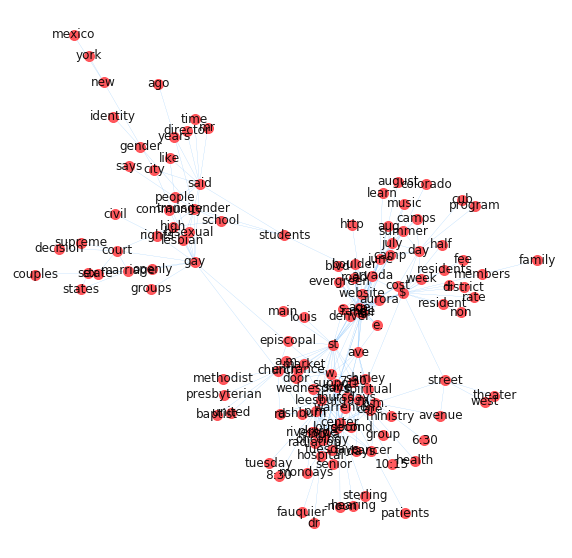

In [87]:
layout = nx.spring_layout(giant5, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant5, ax = ax, pos = layout, labels = {n:n for n in giant5.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [88]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

occupants, freedoms, stamp, madmen, surrounding, security, history, contempt, like, glory, continue, months, sow, harvest, destruction, appalling, old, self, thereof, lax, bent, national, letter, traditions, majestic, assassination, editor, nearly, current, evidenced, treasure, cultivate, notwithstanding, postage, deserved, white, integrity, lack, times, beauty, symbol, disrespect, violated, unite, envelope, house, define, desecration


In [89]:
print(', '.join(max(nx.clique.find_cliques(giant5), key = lambda x: len(x))))

center, leesburg, loudoun, hospital, radiation, oncology, riverside, inova, suite, pkwy


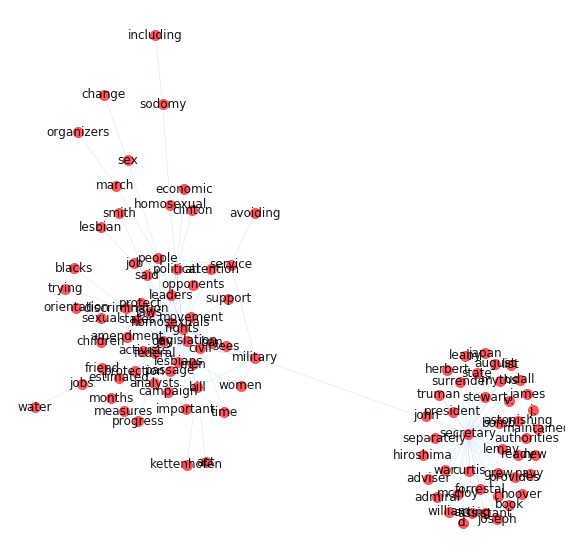

In [51]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [54]:
fig.savefig('transgender_epoch1.png')

In [90]:
gayNeighbors = giant.neighbors('transgender')
g_gay = giant.subgraph(gayNeighbors)
print(nx.info(g_gay))

Name: 
Type: Graph
Number of nodes: 28
Number of edges: 194
Average degree:  13.8571


In [91]:
gayNeighbors5 = giant5.neighbors('transgender')
g_gay5 = giant.subgraph(gayNeighbors5)
print(nx.info(g_gay5))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 18
Average degree:   3.6000


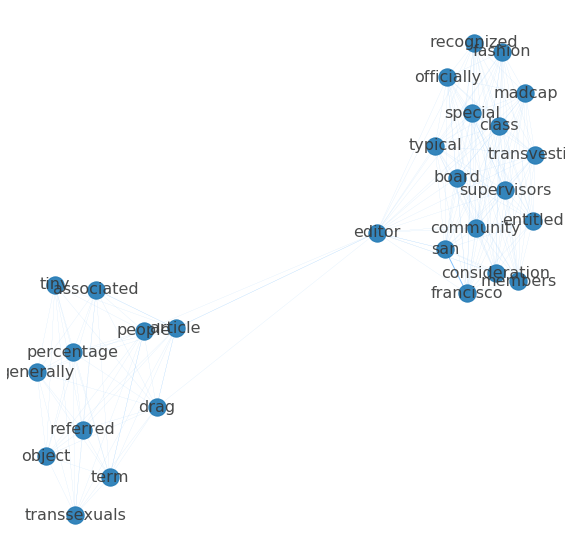

In [94]:
layout_amer = nx.spring_layout(g_gay, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_gay.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_gay.edges(data = True)))
nx.draw(g_gay, ax = ax, pos = layout_amer, labels = {n:n for n in g_gay.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_gay.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

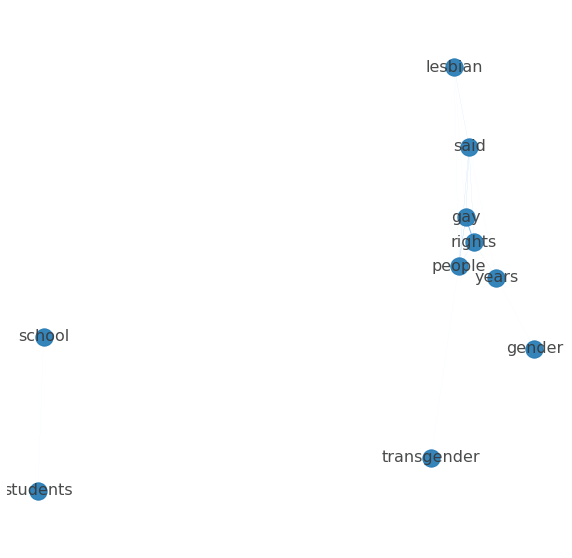

In [92]:
layout_amer = nx.spring_layout(g_gay5, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_gay5.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_gay5.edges(data = True)))
nx.draw(g_gay5, ax = ax, pos = layout_amer, labels = {n:n for n in g_gay5.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_gay5.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

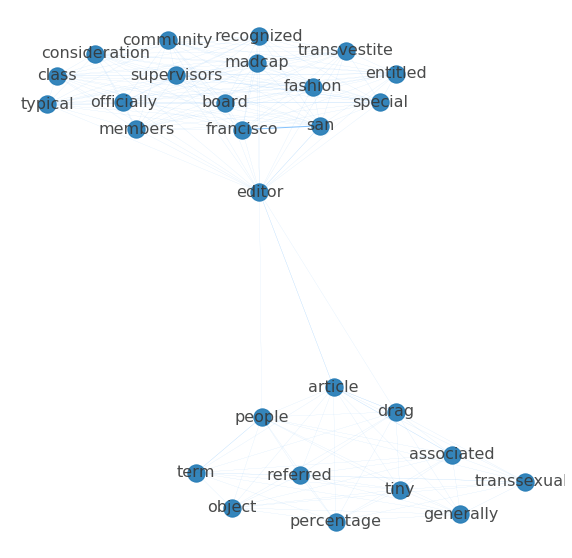

In [74]:
layout_amer = nx.spring_layout(g_gay, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_gay.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_gay.edges(data = True)))
nx.draw(g_gay, ax = ax, pos = layout_amer, labels = {n:n for n in g_gay.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_gay.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 

### Centrality Measures

In [ ]:
dcentralities = nx.degree_centrality(giant)

### Overall Descriptive Statistics of Corpora

#### Create Epochs

In [236]:
coca_corpus_lgbt['year'] = coca_corpus_lgbt['year'].astype('int')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
#coca_corpus_lgbt['Epoch'] = 
coca_corpus_lgbt['Epoch'] = np.where(coca_corpus_lgbt['year'] < 1995, 1, 
                               np.where(coca_corpus_lgbt['year'] < 2000, 2,
                                   np.where(coca_corpus_lgbt['year'] < 2005, 3, 
                                           np.where(coca_corpus_lgbt['year'] < 2010, 4, 5))))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [238]:
coca_corpus_lgbt['Epoch'].value_counts()

5    851
4    719
2    703
1    699
3    676
Name: Epoch, dtype: int64

#### Doc2Vec over time

Make a model with the whole corpus

In [13]:
cocaW2V = gensim.models.word2vec.Word2Vec(coca_corpus_lgbt['normalized_sents'].sum())

In [18]:
coca_epoch1 = coca_corpus_lgbt[coca_corpus_lgbt['Epoch'] == 1]
coca_epoch2 = coca_corpus_lgbt[coca_corpus_lgbt['Epoch'] == 2]
coca_epoch3 = coca_corpus_lgbt[coca_corpus_lgbt['Epoch'] == 3]
coca_epoch4 = coca_corpus_lgbt[coca_corpus_lgbt['Epoch'] == 4]
coca_epoch5 = coca_corpus_lgbt[coca_corpus_lgbt['Epoch'] == 5]

In [19]:
cocaW2V_1 = gensim.models.word2vec.Word2Vec(coca_epoch1['normalized_sents'].sum())
cocaW2V_2 = gensim.models.word2vec.Word2Vec(coca_epoch2['normalized_sents'].sum())
cocaW2V_3 = gensim.models.word2vec.Word2Vec(coca_epoch3['normalized_sents'].sum())
cocaW2V_4 = gensim.models.word2vec.Word2Vec(coca_epoch4['normalized_sents'].sum())
cocaW2V_5 = gensim.models.word2vec.Word2Vec(coca_epoch5['normalized_sents'].sum())

In [20]:
cocaW2V_1.most_similar('lesbian')

[('anti', 0.9526431560516357),
 ('rights', 0.9402064085006714),
 ('black', 0.9284901022911072),
 ('community', 0.9278403520584106),
 ('marlinton', 0.917994499206543),
 ('gay', 0.9148057699203491),
 ('civil', 0.8974543809890747),
 ('men', 0.8938015699386597),
 ('human', 0.89212965965271),
 ('bisexual', 0.8814350366592407)]

In [21]:
cocaW2V_5.most_similar('lesbian')

[('bisexual', 0.9893751740455627),
 ('openly', 0.9890879392623901),
 ('rights', 0.9818717241287231),
 ('anti', 0.9642155170440674),
 ('marriages', 0.9617022275924683),
 ('men', 0.9593490362167358),
 ('couples', 0.9573341608047485),
 ('transgender', 0.9526047110557556),
 ('weddings', 0.951730489730835),
 ('lesbians', 0.9508167505264282)]

In [15]:
cocaW2V.most_similar('lesbian')

[('bisexual', 0.8774988651275635),
 ('openly', 0.8005124926567078),
 ('activist', 0.7701826095581055),
 ('pride', 0.7525296807289124),
 ('transgender', 0.750435471534729),
 ('seminarians', 0.7311526536941528),
 ('latino', 0.7020319700241089),
 ('bashing', 0.6973094940185547),
 ('bathhouses', 0.693189263343811),
 ('activists', 0.6910290122032166)]

In [16]:
cocaW2V.most_similar('gay')

[('gay-', 0.7141209840774536),
 ('lgbt', 0.6390234231948853),
 ('homosexual', 0.6386678814888),
 ('transgender', 0.6297119855880737),
 ('gays', 0.6192551851272583),
 ('sex', 0.6080293655395508),
 ('defamation', 0.5949614644050598),
 ('lesbian', 0.5905921459197998),
 ('trample', 0.5863726139068604),
 ('semitism', 0.5850781202316284)]

In [160]:
cocaW2V_1.most_similar('gay')

[('lesbian', 0.9127849340438843),
 ('black', 0.8849095106124878),
 ('civil', 0.8727728128433228),
 ('rights', 0.8678826093673706),
 ('anti', 0.8632321357727051),
 ('human', 0.8596915006637573),
 ('men', 0.8425957560539246),
 ('community', 0.8386508226394653),
 ('abortion', 0.8160275220870972),
 ('women', 0.8047685623168945)]

In [164]:
cocaW2V_2.most_similar('gay')

[('lesbian', 0.8946217894554138),
 ('civil', 0.879370391368866),
 ('rights', 0.8438219428062439),
 ('men', 0.8062143921852112),
 ('proclamation', 0.791338324546814),
 ('women', 0.7867134213447571),
 ('anti', 0.77864670753479),
 ('transgender', 0.7646859884262085),
 ('community', 0.7588474154472351),
 ('openly', 0.7536221146583557)]

In [165]:
cocaW2V_3.most_similar('gay')

[('rights', 0.9278416037559509),
 ('lesbian', 0.9264847040176392),
 ('civil', 0.8981101512908936),
 ('marriage', 0.8962075114250183),
 ('abortion', 0.8710274696350098),
 ('openly', 0.8419671058654785),
 ('human', 0.8299041390419006),
 ('anti', 0.8288965821266174),
 ('constitutional', 0.8224163055419922),
 ('legal', 0.8179610967636108)]

In [166]:
cocaW2V_4.most_similar('gay')

[('sex', 0.9466642141342163),
 ('rights', 0.9404512643814087),
 ('lesbian', 0.9329816102981567),
 ('civil', 0.9316760897636414),
 ('marriage', 0.9235435128211975),
 ('legalize', 0.8886200189590454),
 ('couples', 0.8885371088981628),
 ('bisexual', 0.885637104511261),
 ('transgender', 0.8800457715988159),
 ('abortion', 0.8620494604110718)]

In [167]:
cocaW2V_5.most_similar('gay')

[('sex', 0.9113506078720093),
 ('civil', 0.8692562580108643),
 ('human', 0.8567376732826233),
 ('equality', 0.8484565019607544),
 ('licenses', 0.8195568919181824),
 ('religious', 0.8189222812652588),
 ('lgbt', 0.8178043365478516),
 ('bisexual', 0.8148080110549927),
 ('gays', 0.8106257915496826),
 ('interracial', 0.8050644397735596)]

In [155]:
cocaW2V.most_similar('gay')   

[('gay-', 0.791437029838562),
 ('homosexual', 0.6514860987663269),
 ('gays', 0.6506102681159973),
 ('transgender', 0.6490733027458191),
 ('lgbt', 0.6336085796356201),
 ('sex', 0.625616192817688),
 ('bragging', 0.6118005514144897),
 ('semitic', 0.6101043224334717),
 ('interracial', 0.5973224639892578),
 ('defamation', 0.5950999855995178)]

In [169]:
cocaW2V_1.most_similar('queer')

[('core', 0.9980084896087646),
 ('successful', 0.9978371262550354),
 ('wonders', 0.9977912902832031),
 ('feared', 0.9975500106811523),
 ('democracy', 0.9975194931030273),
 ('bent', 0.99751216173172),
 ('mainstream', 0.9974664449691772),
 ('powerful', 0.9973936080932617),
 ('enter', 0.9973919987678528),
 ('define', 0.9973829984664917)]

In [170]:
cocaW2V_2.most_similar('queer')

[('accurate', 0.9988260865211487),
 ('sees', 0.998609721660614),
 ('females', 0.9983991980552673),
 ('flamboyant', 0.9983468651771545),
 ('unique', 0.9983450770378113),
 ('presence', 0.998297393321991),
 ('prejudice', 0.9980490207672119),
 ('mixed', 0.998003363609314),
 ('view', 0.9978733062744141),
 ('lovers', 0.997870922088623)]

In [171]:
cocaW2V_3.most_similar('queer')

[('anger', 0.9970327615737915),
 ('innocence', 0.9968702793121338),
 ('evokes', 0.9967389106750488),
 ('seated', 0.9966475963592529),
 ('spice', 0.9963909983634949),
 ('escaped', 0.9963871240615845),
 ('cherished', 0.996361494064331),
 ('instant', 0.9963452219963074),
 ('photographed', 0.9962399005889893),
 ('shout', 0.9960376024246216)]

In [172]:
cocaW2V_4.most_similar('queer')

[('forgotten', 0.9988526105880737),
 ('rap', 0.998710036277771),
 ('nature', 0.9985343217849731),
 ('hero', 0.9984701871871948),
 ('dissertation', 0.9982982277870178),
 ('profoundly', 0.9982606172561646),
 ('biblical', 0.9982084631919861),
 ('sexy', 0.998187780380249),
 ('portraits', 0.998088538646698),
 ('vision', 0.9980666041374207)]

In [173]:
cocaW2V_5.most_similar('queer')

[('uncover', 0.9949591159820557),
 ('tahrir', 0.9945330023765564),
 ('digital', 0.993593692779541),
 ('builds', 0.9934974312782288),
 ('spark', 0.9932520985603333),
 ('tunisia', 0.9931039810180664),
 ('1960s', 0.992722749710083),
 ('belonging', 0.9926149249076843),
 ('rabbis', 0.9923110008239746),
 ('feminism', 0.9918513894081116)]

In [122]:
import copy

In [109]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [121]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [111]:
rawEmbeddings_epoch = rawModels(coca_corpus_lgbt, 'Epoch', text_column_name='normalized_sents')

In [125]:
rawEmbeddings_epoch

{1: <gensim.models.word2vec.Word2Vec at 0x1c47d1f2d0>,
 2: <gensim.models.word2vec.Word2Vec at 0x1c47d06cd0>,
 3: <gensim.models.word2vec.Word2Vec at 0x1c47d5ef90>,
 4: <gensim.models.word2vec.Word2Vec at 0x1c47dd3f10>,
 5: <gensim.models.word2vec.Word2Vec at 0x1c495a8410>}

In [132]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    print(embedding)
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(embedding)
    model.save(name)

1
2
3
4
5


In [133]:
ls

Final_Project.ipynb          embedding_epoch_4
embedding_epoch_0            embedding_epoch_5
embedding_epoch_1            full_corpora.pkl
embedding_epoch_2            the geometry of culture.pdf
embedding_epoch_3


In [134]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [115]:
from gensim.models import Word2Vec

In [135]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

In [136]:
rawEmbeddings_epoch_load

{1: <gensim.models.word2vec.Word2Vec at 0x1c586e68d0>,
 4: <gensim.models.word2vec.Word2Vec at 0x1c54742690>,
 3: <gensim.models.word2vec.Word2Vec at 0x1c585f0190>,
 2: <gensim.models.word2vec.Word2Vec at 0x1c5bf462d0>,
 5: <gensim.models.word2vec.Word2Vec at 0x1c5bf46290>}

In [151]:
rawEmbeddings_epoch_load[1].doesnt_match(['lesbian', 'gay', 'bisexual', 'transgender', 'queer'])

'queer'

In [152]:
rawEmbeddings_epoch_load[2].doesnt_match(['lesbian', 'gay', 'bisexual', 'transgender', 'queer'])

'queer'

In [118]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [137]:
rawEmbeddings_epoch, compared_epoch = compareModels(coca_corpus_lgbt, 'Epoch', text_column_name='normalized_sents', embeddings_raw=rawEmbeddings_epoch_load)

In [138]:
rawEmbeddings_epoch[1]

{1: <gensim.models.word2vec.Word2Vec at 0x1c586e68d0>,
 4: <gensim.models.word2vec.Word2Vec at 0x1c54742690>,
 3: <gensim.models.word2vec.Word2Vec at 0x1c585f0190>,
 2: <gensim.models.word2vec.Word2Vec at 0x1c5bf462d0>,
 5: <gensim.models.word2vec.Word2Vec at 0x1c5bf46290>}

In [ ]:
cocaW2V = gensim.models.word2vec.Word2Vec(text_df['normalized_sents'].sum())

In [ ]:
cocaW2V.most_similar('gay')

In [ ]:
cocaW2V.most_similar('queer')

In [ ]:
cocaW2V.most_similar('lesbian')

In [ ]:
cocaW2V.most_similar('transgender')

In [ ]:
cocaW2V.most_similar('bisexual')

Create 5 year Epochs 

In [2]:
coca_corpus = pd.read_csv("../week-6/1990_2011_coca_corpus.csv")

## Descriptive Statistics - Counting Words & Phrases (Week 4)

Count the number of times relevant words occur within the corpus

Normalize tokens? 

Explore the parts of speech associated with lesbian, gay, bisexual, transgender, queer and the adjectives associated with the nouns, in a small sample of the corpora from the early years (1990) compared to the later years (2012)

In [ ]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

In [ ]:
# take a random sample of texts from 1990

## Vector Space Word Embeddings (Week 7)

In [ ]:
coca_corpus['tokenized_sents'] = coca_corpus['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
coca_corpus['normalized_sents'] = coca_corpus['tokenized_sents'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

In [ ]:
cocaW2V = gensim.models.word2vec.Word2Vec(coca_corpus['normalized_sents'].sum())

### Linguistic Change over Time (Week 7)

In [ ]:
import copy

In [ ]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [ ]:
def compareModels(df, category, text_column_name='normalized_sents', sort = True, embeddings_raw={}):
    """If you are using time as your category sorting is important"""
    if len(embeddings_raw) == 0:
        embeddings_raw = rawModels(df, category, text_column_name, sort)
    cats = sorted(set(df[category]))
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

In [ ]:
def rawModels(df, category, text_column_name='normalized_sents', sort = True):
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF[text_column_name].sum())
    return embeddings_raw

In [ ]:
#Generate Models
rawEmbeddings, comparedEmbeddings = compareModels(ascoDF, 'year')

In [ ]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [ ]:
targetWord = 'gay'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'queer'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'transgender'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'bisexual'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
targetWord = 'lesbian'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

### Word Embeddings by Epoch

In [199]:
rawEmbeddings, comparedEmbeddings = compareModels(coca_corpus_lgbt, 'Epoch')

In [200]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)


In [202]:
import seaborn

gay


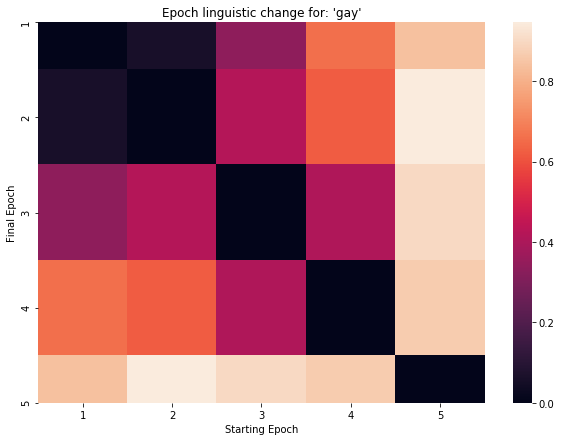

In [204]:
targetWord = 'gay'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting Epoch")
ax.set_ylabel("Final Epoch")
ax.set_ylabel("Final Epoch")
ax.set_title("Epoch linguistic change for: '{}'".format(targetWord))
plt.show()

lesbian


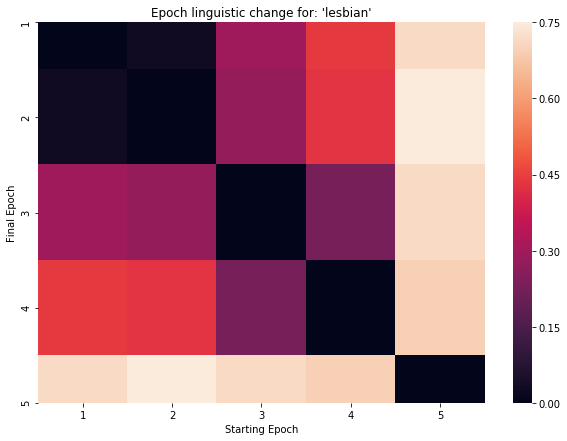

In [207]:
targetWord = 'lesbian'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting Epoch")
ax.set_ylabel("Final Epoch")
ax.set_ylabel("Final Epoch")
ax.set_title("Epoch linguistic change for: '{}'".format(targetWord))
plt.show()

bisexual


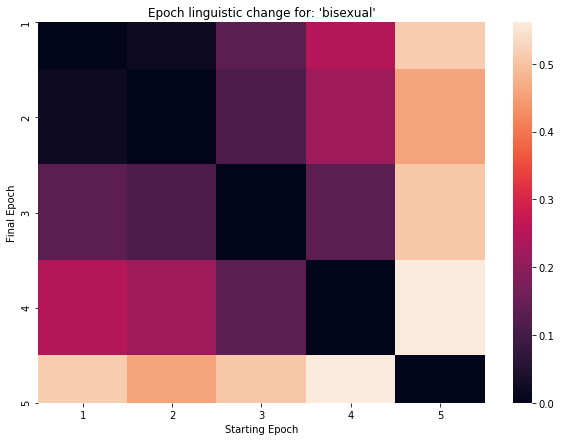

In [208]:
targetWord = 'bisexual'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting Epoch")
ax.set_ylabel("Final Epoch")
ax.set_ylabel("Final Epoch")
ax.set_title("Epoch linguistic change for: '{}'".format(targetWord))
plt.show()

queer


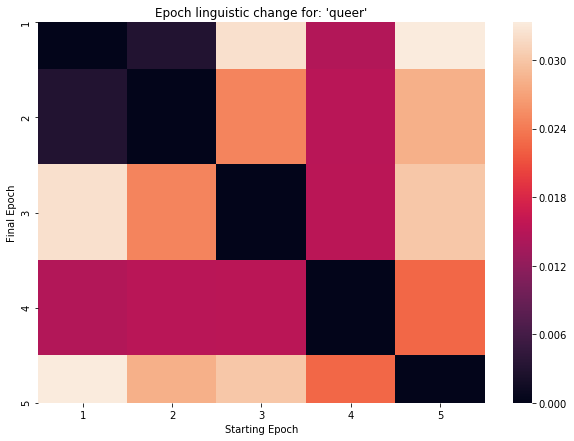

In [206]:
targetWord = 'queer'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting Epoch")
ax.set_ylabel("Final Epoch")
ax.set_ylabel("Final Epoch")
ax.set_title("Epoch linguistic change for: '{}'".format(targetWord))
plt.show()

In [ ]:
rawEmbeddings_epoch = rawModels(coca_corpus, 'Epoch', text_column_name='normalized sents')    

In [ ]:
for epoch, embedding in enumerate(rawEmbeddings_epoch):
    model = rawEmbeddings_epoch[embedding]
    name = "embedding_epoch_" + str(epoch)
    model.save(name)

In [ ]:
from gensim.models import Word2Vec

In [ ]:
def file_to_embeddings(address, kind):
    rawEmbeddings = {}
    for file in os.listdir(address):
        if "embedding_"+kind in file:
            e, kind_, kind_type = file.split("_")
            kind_type = eval(kind_type)
            rawEmbeddings[kind_type] = Word2Vec.load(file)
    return rawEmbeddings

In [ ]:
rawEmbeddings_epoch_load = file_to_embeddings(".", "epoch")

### Projecting words on Dimensions of Gender, Class, and Race

In [188]:
lgbt = ["black", "white", "poor", "rich", "man", "woman", "lesbian","gay","bisexual","transgender","queer","asexual","drag","activist","feminist", "butch", "femme", "stud"]

In [193]:
lgbt2 = ["lesbian","gay","bisexual","transgender","queer","asexual","drag","activist","feminist", "butch", "femme", "stud"]

In [175]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [176]:
Gender = dimension(cocaW2V, ['man'], ['woman'])
Race = dimension(cocaW2V, ['black','blacks'], ['white', 'whites'])
Class = dimension(cocaW2V, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])

In [180]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    h = []
    t = []
    
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(cocaW2V[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(cocaW2V[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(cocaW2V[word].reshape(1,-1), Class.reshape(1,-1))[0][0])

    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

In [189]:
lgbtdf = makeDF(cocaW2V, lgbt)

In [194]:
lgbtdf2 = makeDF(cocaW2V, lgbt2)

In [248]:
lgbtdf2_1 = makeDF(cocaW2V_1, lgbt2)

In [247]:
lgbtdf2_5 = makeDF(cocaW2V_5, lgbt2)

In [244]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

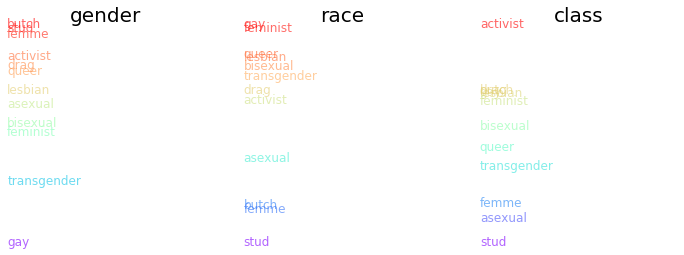

In [245]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, lgbtdf2_1, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, lgbtdf2_1, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, lgbtdf2_1, 'class')
plt.show()

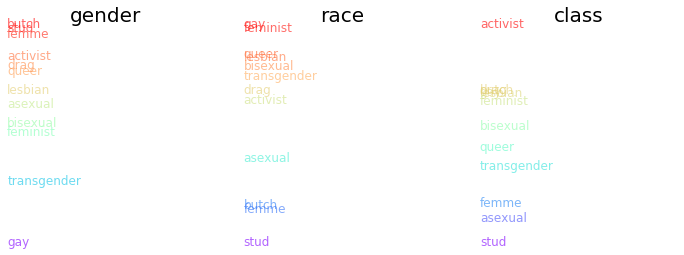

In [246]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, lgbtdf2_5, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, lgbtdf2_5, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, lgbtdf2_5, 'class')
plt.show()

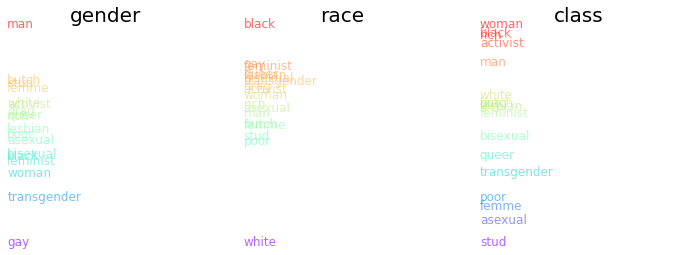

In [249]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, lgbtdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, lgbtdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, lgbtdf, 'class')
plt.show()

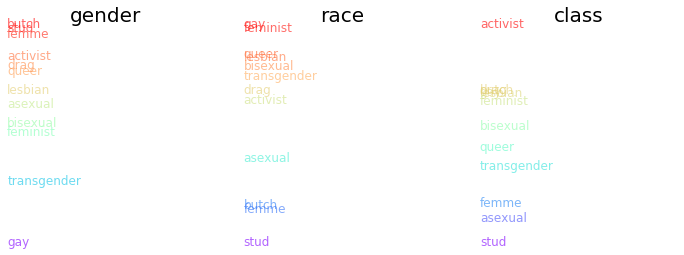

In [195]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, lgbtdf2, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, lgbtdf2, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, lgbtdf2, 'class')
plt.show()

In [209]:
plt.show()